In [0]:
# Importing All dependencies to be Used

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
rng=np.random

In [0]:
# Building the Graph!


# Declaring Tensorflow variables and placeholders for Linear regression Model
# The equation of a line is : y=wx+b
# We will declare two tensorflow variables (w and b) and two tensorflow placeholders (x and y)

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [0]:
# Defining the Equation of Line

pred = tf.add(tf.multiply(X, W), b)  # Equivalent to : pred_y=wx+b

# Defining the Loss ( Mean Squared Error )
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Defining the Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# Initializing all variables
init=tf.global_variables_initializer()

# End Defining the Graph! 


Epoch: 0050 cost= 0.080245636 W= 0.281688 b= 0.570582
Epoch: 0100 cost= 0.079867266 W= 0.279779 b= 0.584315
Epoch: 0150 cost= 0.079532750 W= 0.277984 b= 0.597231
Epoch: 0200 cost= 0.079236940 W= 0.276295 b= 0.60938
Epoch: 0250 cost= 0.078975506 W= 0.274707 b= 0.620804
Epoch: 0300 cost= 0.078744367 W= 0.273213 b= 0.631547
Epoch: 0350 cost= 0.078540027 W= 0.271809 b= 0.641652
Epoch: 0400 cost= 0.078359380 W= 0.270488 b= 0.651156
Epoch: 0450 cost= 0.078199685 W= 0.269245 b= 0.660096
Epoch: 0500 cost= 0.078058533 W= 0.268076 b= 0.668503
Epoch: 0550 cost= 0.077933773 W= 0.266977 b= 0.676411
Epoch: 0600 cost= 0.077823475 W= 0.265943 b= 0.683848
Epoch: 0650 cost= 0.077726021 W= 0.264971 b= 0.690843
Epoch: 0700 cost= 0.077639878 W= 0.264056 b= 0.697422
Epoch: 0750 cost= 0.077563770 W= 0.263196 b= 0.70361
Epoch: 0800 cost= 0.077496499 W= 0.262387 b= 0.70943
Epoch: 0850 cost= 0.077437043 W= 0.261626 b= 0.714904
Epoch: 0900 cost= 0.077384546 W= 0.260911 b= 0.720053
Epoch: 0950 cost= 0.077338159 W

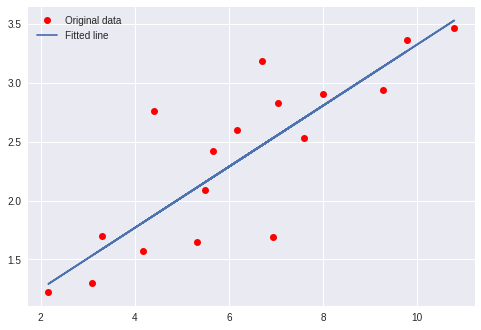

In [36]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(1000):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % 50 == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()